In [ ]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score


In [ ]:

# Cargar el conjunto de datos CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:

# Normalizar los datos a un rango entre 0 y 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir las etiquetas a formato de una sola dimensión
y_train = y_train.flatten()
y_test = y_test.flatten()


In [ ]:

# Crear el modelo de la red neuronal convolucional (CNN)
model = Sequential()


In [ ]:

# Capa convolucional 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Capa convolucional 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


In [ ]:

# Capa convolucional 3
model.add(Conv2D(64, (3, 3), activation='relu'))


In [ ]:

# Aplanar las salidas para pasar a las capas densas
model.add(Flatten())

# Capa densa con Dropout para regularización
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout de 50% para evitar sobreajuste

# Capa de salida con 10 clases (CIFAR-10 tiene 10 categorías)
model.add(Dense(10, activation='softmax'))


In [ ]:

# Compilar el modelo con optimización usando Adam
optimizer = Adam(learning_rate=0.001)  # Ajuste de tasa de aprendizaje
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir EarlyStopping para evitar sobreajuste y optimizar la cantidad de épocas
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Precisión del modelo CNN optimizado: {test_accuracy * 100:.2f}%")


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.2428 - loss: 2.0057 - val_accuracy: 0.4803 - val_loss: 1.4647
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 76ms/step - accuracy: 0.4539 - loss: 1.5020 - val_accuracy: 0.5374 - val_loss: 1.2792
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 77ms/step - accuracy: 0.5140 - loss: 1.3501 - val_accuracy: 0.5879 - val_loss: 1.1557
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.5580 - loss: 1.2453 - val_accuracy: 0.5959 - val_loss: 1.1158
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.5825 - loss: 1.1821 - val_accuracy: 0.6273 - val_loss: 1.0373
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6085 - loss: 1.1198 - val_accuracy: 0.6477 - val_loss: 1.0119
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 78ms/step - accuracy: 0.6256 - loss: 1.0643 - val_accuracy: 0.6583 - val_loss: 0.9633
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 75ms/step - accuracy: 0.6378 - loss: 1.0233 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


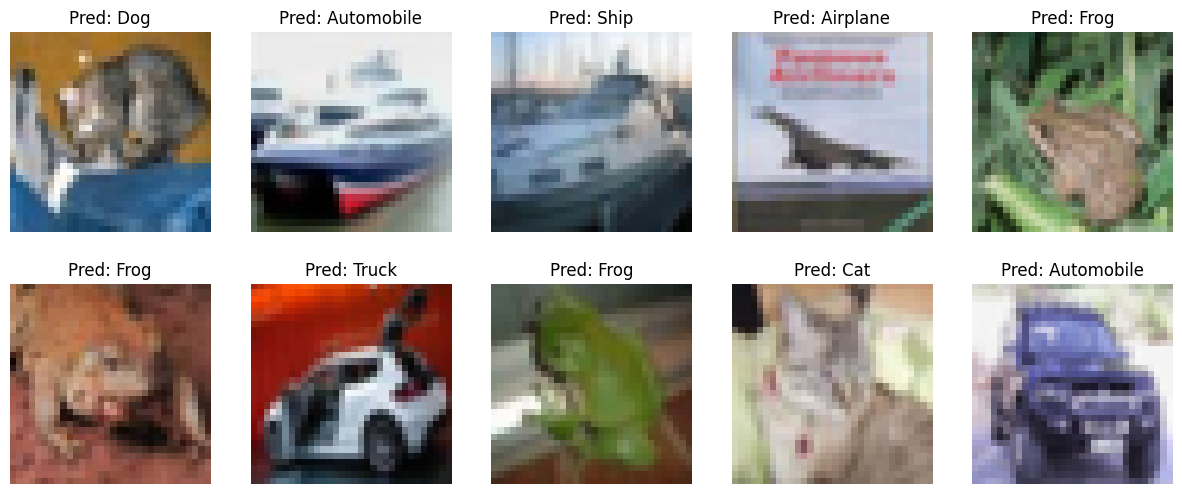

In [ ]:

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar algunas imágenes de prueba y sus predicciones
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Etiquetas de las clases del CIFAR-10
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Mostrar las primeras 10 imágenes y sus etiquetas predichas
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    ax.set_title(f"Pred: {labels[y_pred_classes[i]]}")
    ax.axis('off')

plt.show()
